In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("coin_gecko.csv")
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [3]:
df.shape

(500, 9)

In [4]:
df.isnull().sum()

,0
coin,0
symbol,0
price,0
1h,3
24h,3
7d,3
24h_volume,3
mkt_cap,0
date,0


In [5]:
# drop missing values
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

,0
coin,0
symbol,0
price,0
1h,0
24h,0
7d,0
24h_volume,0
mkt_cap,0
date,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        497 non-null    object 
 1   symbol      497 non-null    object 
 2   price       497 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     497 non-null    float64
 8   date        497 non-null    object 
dtypes: float64(6), object(3)
memory usage: 38.8+ KB


In [8]:
# convert date column to date time format
df['date']=pd.to_datetime(df['date'])


In [9]:
df.head(2)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.46,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.41,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16


In [10]:
# Feature Engineering
df['volatility'] = df['price'].pct_change().rolling(window=5).std()  # price volatility over 5 days
df['rolling_avg_price'] = df['price'].rolling(window=5).mean()       # 5-day price average
df['liquidity_ratio'] = df['24h_volume'] / (df['mkt_cap'] + 1)       # to avoid division by zero

# Drop NA from rolling features
df.dropna(inplace=True)

In [11]:
df.head(2)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,volatility,rolling_avg_price,liquidity_ratio
5,XRP,XRP,0.785018,0.019,0.019,0.089,3.925205e+09,3.753079e+10,2022-03-16,171.379808,626.124978,0.104586
6,Terra,LUNA,89.510000,0.024,-0.005,0.046,2.661508e+09,3.294596e+10,2022-03-16,166.111096,95.144978,0.080784


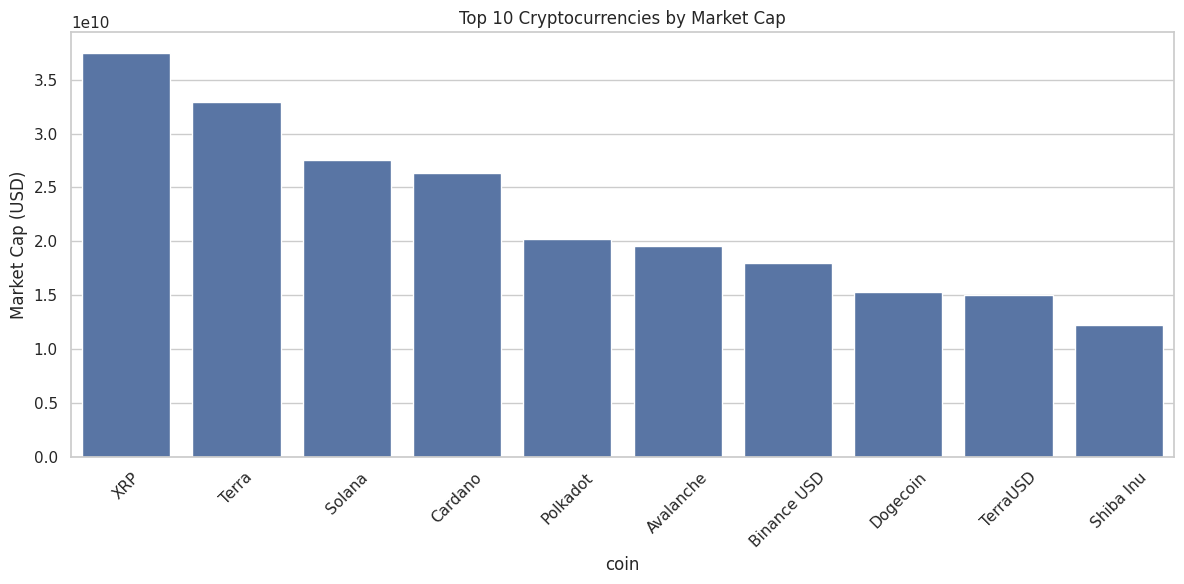

In [20]:
# Set Seaborn style for plots
sns.set(style="whitegrid")

# Top 10 cryptocurrencies by market cap
top_10_mktcap = df.sort_values(by='mkt_cap', ascending=False).head(10)

# Plot: Top 10 Market Cap Coins
plt.figure(figsize=(12, 6))
sns.barplot(x='coin', y='mkt_cap', data=top_10_mktcap)
plt.title('Top 10 Cryptocurrencies by Market Cap')
plt.xticks(rotation=45)
plt.ylabel('Market Cap (USD)')
plt.tight_layout()
plt.show()



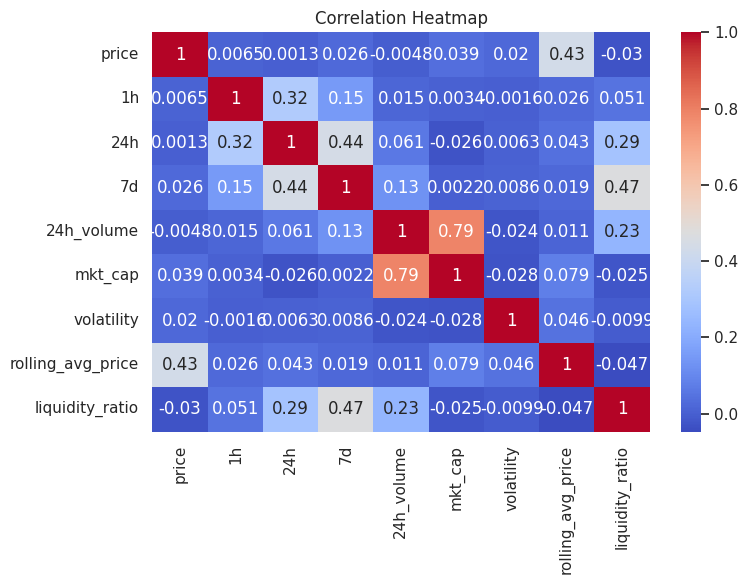

In [22]:
#Correlation Heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='float64').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



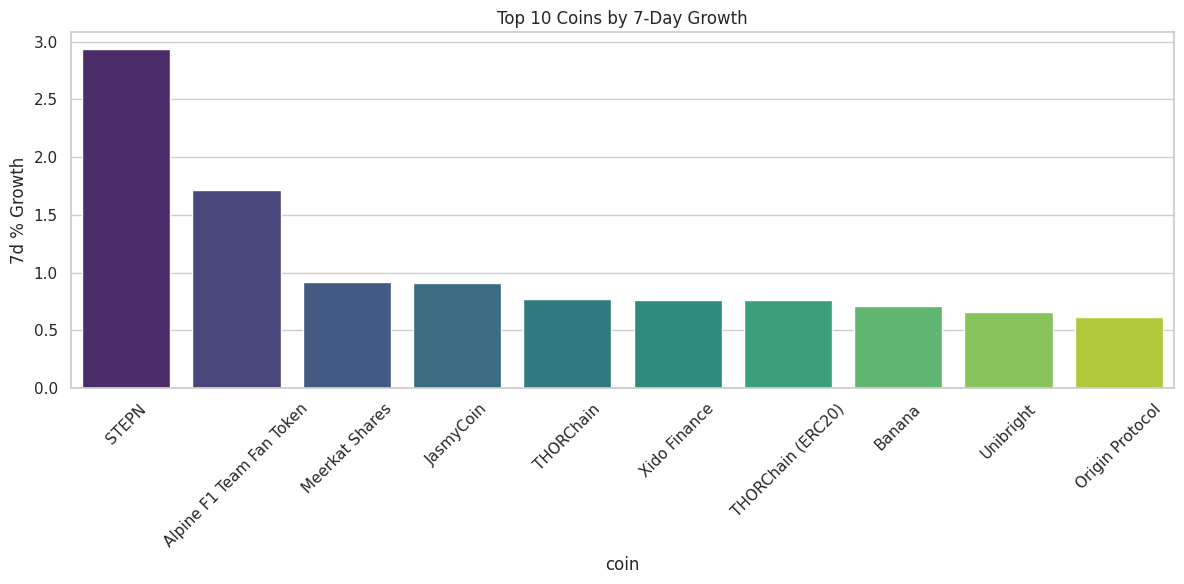

In [23]:
# Growth in 7 days (Top 10 coins)
top_7d_growth = df.sort_values(by='7d', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='coin', y='7d', data=top_7d_growth, palette='viridis')
plt.title('Top 10 Coins by 7-Day Growth')
plt.ylabel('7d % Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Define features and target
features = ['price', '1h', '24h', '7d', 'rolling_avg_price', 'volatility', '24h_volume']
target = 'liquidity_ratio'

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
# train the Random Forest Model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Evaluate the model
y_pred=model.predict(X_test_scaled)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute  Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error(MSE):",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute  Error (MAE): 0.0894466743711104
Mean Squared Error(MSE): 0.2172442135610279
R2 Score: 0.14762553770222686


In [ ]:
# Save the model
import joblib
joblib.dump(model,'liquidity_model.pkl')
joblib.dump(scaler,'scaler.pkl')
